# **SUPPORT VECTOR MACHINE**

## 1. Introdução

O Support Vector Machine (SVM) é um algoritmo de aprendizado supervisionado usado tanto para classificação quanto para regressão, mas é mais amplamente utilizado em problemas de classificação. O objetivo do SVM é encontrar um hiperplano que melhor separe as diferentes classes em um espaço multidimensional. https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106

<img src="assets\support-vector-machine-svm.webp" alt="svm" style="display: block; margin: auto; width: 500px;">

## 1.1. Objectivo

Treinar um modelo atraves do algoritmo Support Vector Machine (SVM) para prever uma variável de destino com base nos demais atributos do conjunto de dados. Neste caso, o objetivo é treinar o modelo para prever a probabilidade de um edifício apresentar uma reivindicação de seguro durante o período de cobertura.

## 1.2. Informação dos dados

Trata-se de registros de inspeções realizadas em edifícios na Nigéria, onde coletamos dados sobre estruturas que sofreram danos por diversos motivos. Para mais detalhes, recomendo consultar o notebook <a href="data_cleaning.ipynb">Limpeza de Dados (Clique)</a>, ou visitar a plataforma da Zindi, de onde os dados foram extraídos.

## 2. Importar dados e Bibliotecas

- Certifique-se de que as bibliotecas necessárias estão instaladas para garantir o correto funcionamento do código.
- Caso ainda não tenha as bibliotecas instaladas, utilize a célula abaixo para instalar.

Caso não tenha as bibliotecas instaladas, remova o comentário `#` da célula abaixo e execute para instalar:

In [5]:
# !pip install pandas scikit-learn matplotlib seaborn

In [8]:
import pandas as pd #para leitura de dados
from sklearn.svm import SVC # o algoritmo support vector machine
from sklearn.preprocessing import LabelEncoder, StandardScaler #Codificador e Padronizador de dados
import matplotlib.pyplot as plt #para imprimir graficos
import seaborn as sns #biblioteca para visualização de dados
from sklearn.model_selection import train_test_split #para divsão dos dados
from sklearn.metrics import accuracy_score, classification_report #para medir a performance
from sklearn.metrics import confusion_matrix #para calcular a confusão do modelo

In [10]:
# carregar dados já limpos
data = pd.read_csv('https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/main/datasets/aprendizagem-supervisionada/data_cleaned.csv')

# mostrar um resumo do que temos nos dados
data.head()


,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,4,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,4,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,4,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


## 3. Normalizar os dados

Converter dados categóricos, quando necessário, em valores numéricos pode ser realizado utilizando técnicas como one-hot encoding ou label encoding, uma vez que os algoritmos de machine learning, por natureza, não processam textos, mas sim valores numéricos, como 0 e 1. Esse tipo de transformação é essencial para que os modelos consigam interpretar e processar adequadamente as informações categóricas.

_________________________________________________________

Vantagens e Desvantagens:

1. One-hot encoding (conversão para múltiplas colunas binárias):<br>
    Vantagem: Garante que o modelo interprete corretamente categorias que não possuem uma relação de ordem. <br>
    Desvantagem: Pode gerar um aumento significativo no número de colunas, especialmente em casos com muitas categorias.


2. Label encoding (atribuição de valores inteiros):<br>
    Vantagem: Mantém o número de colunas inalterado ou pequeno. <br>
    Desvantagem: Pode induzir uma ordem artificial entre as categorias, o que nem sempre é desejável.


_________________________________________________________

Colunas como **Building_Painted, Building_Fenced, Garden, Settlement**, que são categóricas e representadas por strings como "V", "N", precisam ser convertidas para valores numéricos a fim de serem utilizadas de forma eficiente no modelo.

In [32]:
# Converta variáveis ​​categóricas usando a codificação de rótulos
label_encoder = LabelEncoder()
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Geo_Code']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Estandardizar colunas numéricas usando o StandardScaler
scaler = StandardScaler()
numerical_columns = ['Building Dimension', 'YearOfObservation', 'Insured_Period', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows', 'Claim']  #numerical columns 

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## 4. Divisão

- Variáveis preditoras (X): Todas as colunas exceto a variável alvo.
- Variável alvo (y): A variável que você deseja prever (o "target"). No nosso caso é o Residential.

In [33]:
# os recursos (X) e o destino (y)
X = data.drop(columns=['Residential'])  # Features (drop the target column)
y = data['Residential']  # Target variable

Dividimos o dataset em conjuntos de treino (para ajustar o modelo) e conjuntos de teste (para avaliar o desempenho do modelo).
- Geralmente, uma divisão de 80/20 ou 70/30 é utilizada.

In [34]:
# Divida os dados em conjuntos de treino e teste (80% de treino, 20% de teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Treino

In [35]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## 6. Analise dos resultados

In [36]:
# Faça previsões e avalie o modelo
y_pred = svm_model.predict(X_test)

#  Calculando accuracias
accuracy = accuracy_score(y_test, y_pred)

# calculando outrs metricas
classification_rep = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy}\n")
print(f"Relatório de classificação: \n{classification_rep}")

Acurácia: 0.7418439716312056

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1466
           1       0.61      0.43      0.50       649

    accuracy                           0.74      2115
   macro avg       0.70      0.65      0.66      2115
weighted avg       0.73      0.74      0.73      2115



0.7418 ou cerca de 74%.<br>
A acurácia indica que o modelo fez previsões corretas em 74% dos casos. Este valor representa o percentual de todas as previsões (tanto da classe 0 como da classe 1) que foram feitas corretamente.

- A precisão da classe 1 é menor, sugerindo que o modelo está a ter mais falsos positivos na classe 1 (previsões incorretas como 1).
- A revocação da classe 1 é baixa, sugerindo que o modelo falha em capturar corretamente muitos casos da classe 1, levando a falsos negativos (previsões incorretas como 0 quando deveriam ser 1).
- O f1-score para a classe 1 é particularmente baixo, indicando um equilíbrio pobre entre precisão e revocação nesta classe.

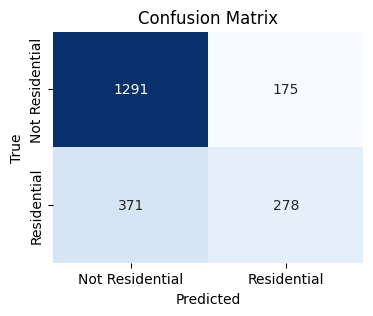

In [37]:

# Gerando a matrix de confisão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimindo a matrix de confusoa
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Residential', 'Residential'],
            yticklabels=['Not Residential', 'Residential'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A diagonal principal da matriz de confusão representa os acertos (previsões corretas), enquanto os elementos fora da diagonal principal (a "diagonal secundária") representam os erros (falsos positivos e falsos negativos).<br><br>

Interpretação: <br>
- O modelo previu corretamente 1291 casos como 0 e 278 casos como 1.
- Houve 172 erros onde o modelo previu incorretamente 0 quando o verdadeiro valor era 1 (falsos negativos).
- Houve 371 erros onde o modelo previu 1 quando o verdadeiro valor era 0 (falsos positivos).

___________________________________

*"Em algum lugar, algo incrível está esperando para ser descoberto."* - Carl Sagan

TEM MAIS 🚀🚀

Ver mais: <a herf="data_cleaning.ipynb">Data Cleaning</a> <br>
Ver mais: <a herf="decision_tree.ipynb">Supporte Vector Machine</a>

by Do Rosário, Euclides